# Evaluating Edge Density

Visual complexity calculated as the ratio between the number of pixels which are edges and the total number of pixels in the image file size.

In [99]:
from skimage import img_as_float, feature
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import defaultdict
import random
import re
import os

In [61]:
# Helper functions
def find_nearest_indices(values, target, n_samples=5):
    """
    Find the indices of n_samples values nearest to the target in the values array.
    """
    indices = np.argsort(np.abs(values - target))[:n_samples]
    return indices

def plot_sampled_images(images, complexities, indices, title):
    """
    Plot a subset of pre-loaded PIL images specified by their indices.
    """
    fig, axes = plt.subplots(1, len(indices), figsize=(15, 10))
    fig.suptitle(title)
    if len(indices) == 1:
        axes = [axes]
    for ax, idx in zip(axes, indices):
        img = images[idx]
        complexity = complexities[idx]
        ax.imshow(img)
        ax.axis('off')
        ax.text(0.5, -0.1, f'Complexity: {complexity:.4f}', ha='center', va='top', transform=ax.transAxes, fontsize=8)
    plt.show()

In [62]:
def compute_edge_density(image):
    gray_image = img_as_float(image)
    # Apply Canny edge detector
    edges = feature.canny(gray_image)
    # Compute edge density
    edge_density = np.sum(edges) / edges.size
    return edge_density

In [63]:
os.listdir("allGoodCellPatchesBinMasks2/")

['0_mask.png',
 '1000_mask.png',
 '1001_mask.png',
 '1002_mask.png',
 '1003_mask.png',
 '1004_mask.png',
 '1005_mask.png',
 '1006_mask.png',
 '1007_mask.png',
 '1008_mask.png',
 '1009_mask.png',
 '100_mask.png',
 '1010_mask.png',
 '1011_mask.png',
 '1012_mask.png',
 '1013_mask.png',
 '1014_mask.png',
 '1015_mask.png',
 '1016_mask.png',
 '1017_mask.png',
 '1018_mask.png',
 '1019_mask.png',
 '101_mask.png',
 '1020_mask.png',
 '1021_mask.png',
 '1022_mask.png',
 '1023_mask.png',
 '1024_mask.png',
 '1025_mask.png',
 '1026_mask.png',
 '1027_mask.png',
 '1028_mask.png',
 '1029_mask.png',
 '102_mask.png',
 '1030_mask.png',
 '1031_mask.png',
 '1032_mask.png',
 '1033_mask.png',
 '1034_mask.png',
 '1035_mask.png',
 '1036_mask.png',
 '1037_mask.png',
 '1038_mask.png',
 '1039_mask.png',
 '103_mask.png',
 '1040_mask.png',
 '1041_mask.png',
 '1042_mask.png',
 '1043_mask.png',
 '1044_mask.png',
 '1045_mask.png',
 '1046_mask.png',
 '1047_mask.png',
 '1048_mask.png',
 '1049_mask.png',
 '104_mask.png',


In [64]:
allPaths = os.listdir("allGoodCellPatchesBinMasks2/")
allPathsConcatenated = ["allGoodCellPatchesBinMasks2/" + path for path in allPaths]

In [65]:
# Function to extract the numeric part from each file path
def extract_number(file_path):
    match = re.search(r'/(\d+)_', file_path)
    return int(match.group(1)) if match else 0

In [66]:
sortedFilePaths = sorted(allPathsConcatenated, key=extract_number)

In [67]:
sortedFilePaths

['allGoodCellPatchesBinMasks2/0_mask.png',
 'allGoodCellPatchesBinMasks2/1_mask.png',
 'allGoodCellPatchesBinMasks2/2_mask.png',
 'allGoodCellPatchesBinMasks2/3_mask.png',
 'allGoodCellPatchesBinMasks2/4_mask.png',
 'allGoodCellPatchesBinMasks2/5_mask.png',
 'allGoodCellPatchesBinMasks2/6_mask.png',
 'allGoodCellPatchesBinMasks2/7_mask.png',
 'allGoodCellPatchesBinMasks2/8_mask.png',
 'allGoodCellPatchesBinMasks2/9_mask.png',
 'allGoodCellPatchesBinMasks2/10_mask.png',
 'allGoodCellPatchesBinMasks2/11_mask.png',
 'allGoodCellPatchesBinMasks2/12_mask.png',
 'allGoodCellPatchesBinMasks2/13_mask.png',
 'allGoodCellPatchesBinMasks2/14_mask.png',
 'allGoodCellPatchesBinMasks2/15_mask.png',
 'allGoodCellPatchesBinMasks2/16_mask.png',
 'allGoodCellPatchesBinMasks2/17_mask.png',
 'allGoodCellPatchesBinMasks2/18_mask.png',
 'allGoodCellPatchesBinMasks2/19_mask.png',
 'allGoodCellPatchesBinMasks2/20_mask.png',
 'allGoodCellPatchesBinMasks2/21_mask.png',
 'allGoodCellPatchesBinMasks2/22_mask.png'

In [68]:
pillImagesMasks = [Image.open(i) for i in sortedFilePaths]
pillImagesOriginal = [Image.open(i.replace("BinMasks2", "WithNoBackgroundInfo").replace("_mask", "")) for i in sortedFilePaths]

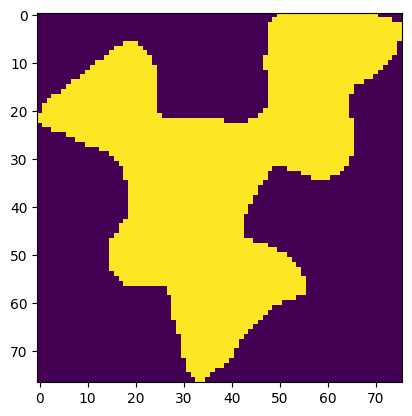

In [69]:
plt.imshow(pillImagesMasks[0])

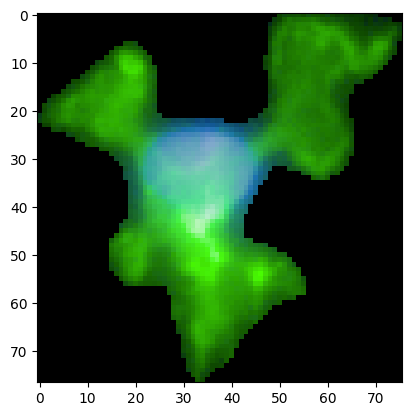

In [70]:
plt.imshow(pillImagesOriginal[0])

We compute all edge densities. Note we make use of the binary masks.

In [71]:
allEdgeDensities = [compute_edge_density(i) for i in pillImagesMasks]

In [72]:
max(allEdgeDensities)

0.10380116959064327

In [73]:
min(allEdgeDensities)

0.01518658810325477

In [74]:
complexities = np.array(allEdgeDensities)

min_complexity = np.min(complexities)
max_complexity = np.max(complexities)
mean_complexity = np.mean(complexities)
median_complexity = np.median(complexities)
std_complexity = np.std(complexities)

print(f"Minimum Visual Complexity: {min_complexity}")
print(f"Maximum Visual Complexity: {max_complexity}")
print(f"Mean Visual Complexity: {mean_complexity}")
print(f"Median Visual Complexity: {median_complexity}")
print(f"Standard Deviation of Visual Complexity: {std_complexity}")

Minimum Visual Complexity: 0.01518658810325477
Maximum Visual Complexity: 0.10380116959064327
Mean Visual Complexity: 0.045588416882904645
Median Visual Complexity: 0.045231606404029505
Standard Deviation of Visual Complexity: 0.012283471691704228


c:\Users\anabi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


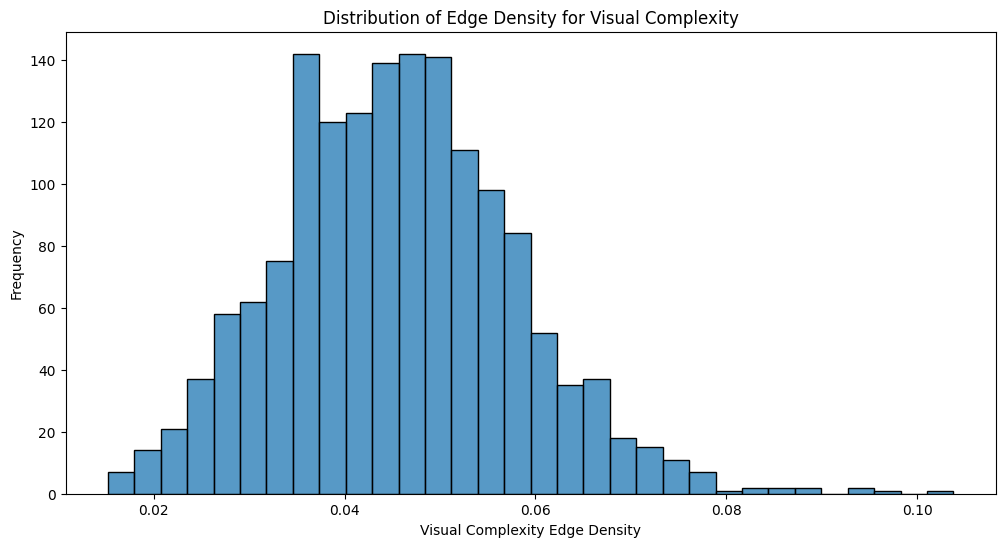

In [75]:
# Distribution
plt.figure(figsize=(12, 6))
sns.histplot(complexities)
plt.title('Distribution of Edge Density for Visual Complexity')
plt.xlabel('Visual Complexity Edge Density')
plt.ylabel('Frequency')
plt.show()

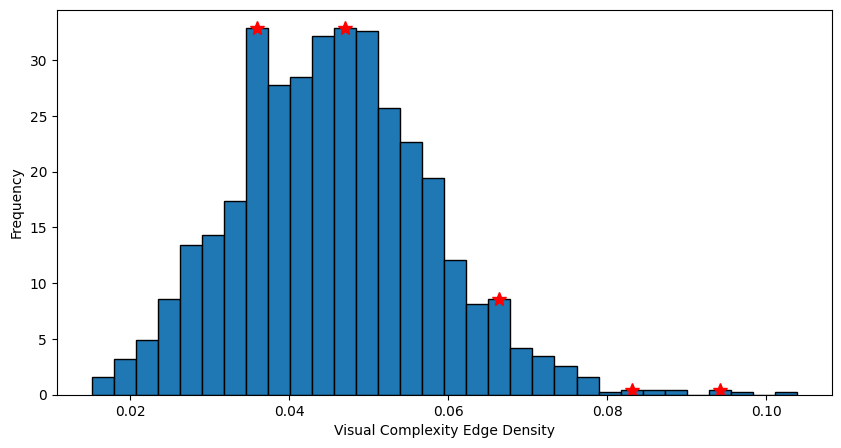

In [76]:
hist, bin_edges = np.histogram(complexities, bins='auto', density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Find peaks
peaks, _ = find_peaks(hist)

# histogram with peaks
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, hist, width=np.diff(bin_edges), edgecolor='black', align='center')
plt.plot(bin_centers[peaks], hist[peaks], 'r*', ms=10)
plt.xlabel('Visual Complexity Edge Density')
plt.ylabel('Frequency')
plt.show()


In [77]:
# The bin_centers values at the peaks give an estimate of the peak positions
peak_positions = bin_centers[peaks]
print("Peak positions:", peak_positions)

Peak positions: [0.03595563 0.04703245 0.06641689 0.08303213 0.09410895]


In [78]:
peak1 = peak_positions[0]
peak2 = peak_positions[1]

In [79]:
peak1_indices = find_nearest_indices(complexities, peak1, n_samples=5)
peak2_indices = find_nearest_indices(complexities, peak2, n_samples=5)

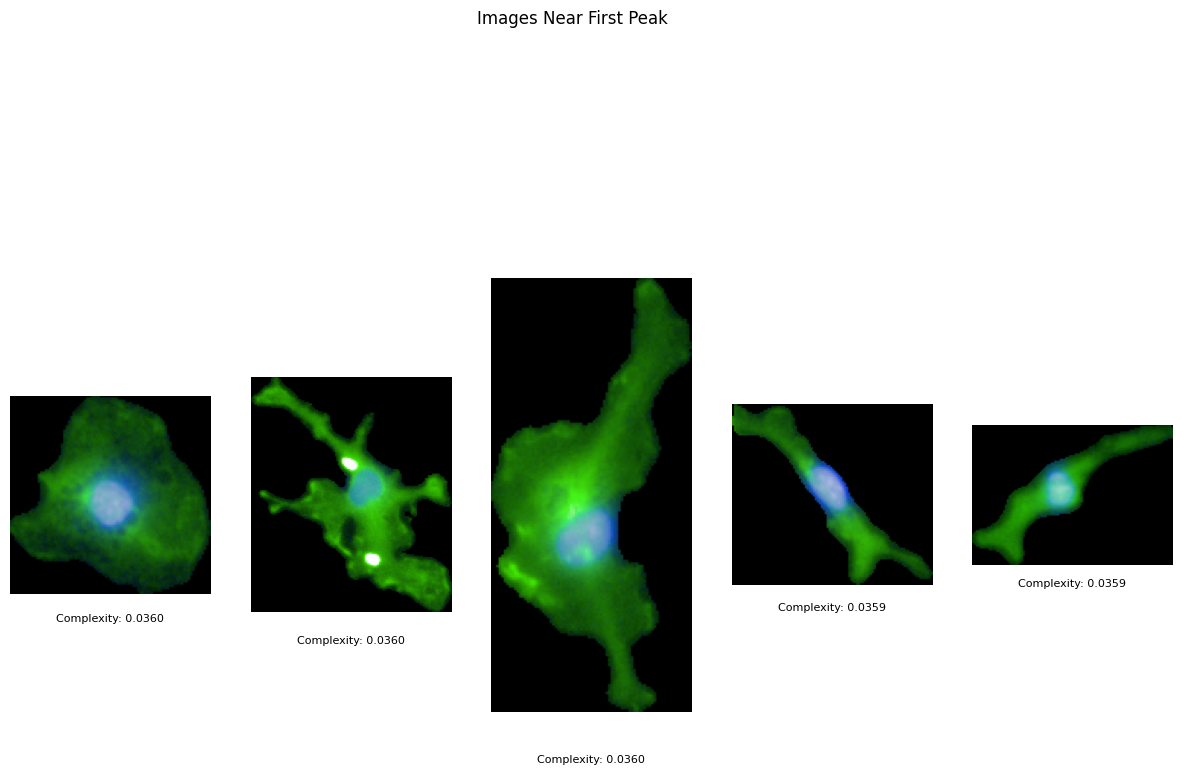

In [80]:
plot_sampled_images(pillImagesOriginal, complexities, peak1_indices, "Images Near First Peak")

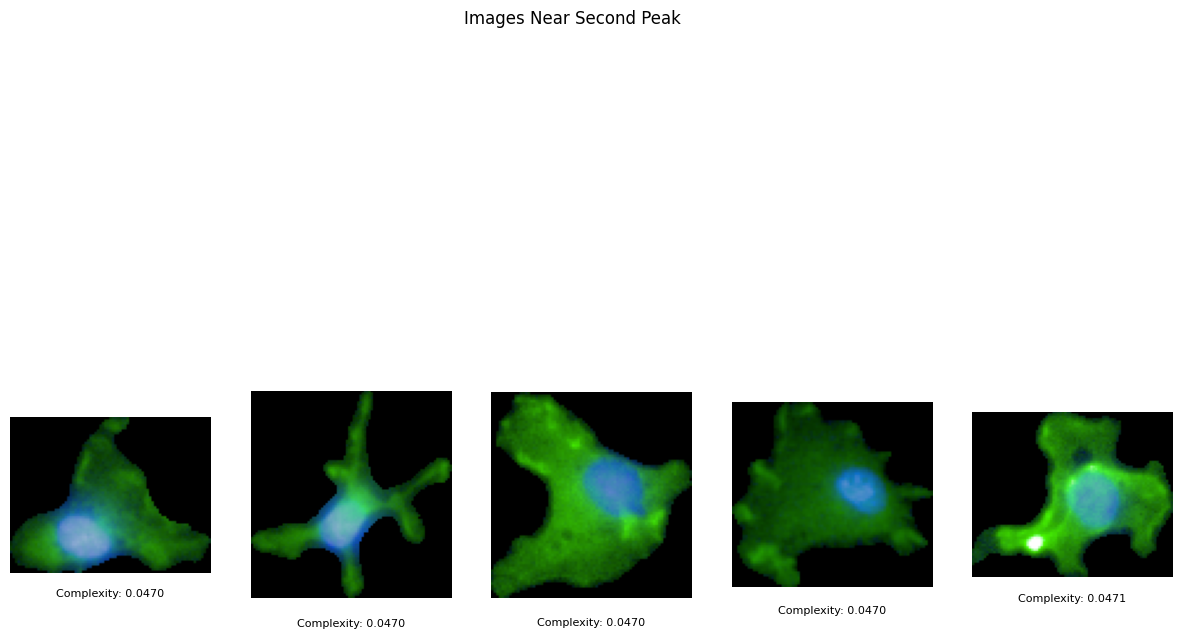

In [81]:
plot_sampled_images(pillImagesOriginal, complexities, peak2_indices, "Images Near Second Peak")

In [83]:
min_indices = find_nearest_indices(complexities, np.min(complexities))
mean_indices = find_nearest_indices(complexities, np.mean(complexities))
max_indices = find_nearest_indices(complexities, np.max(complexities))

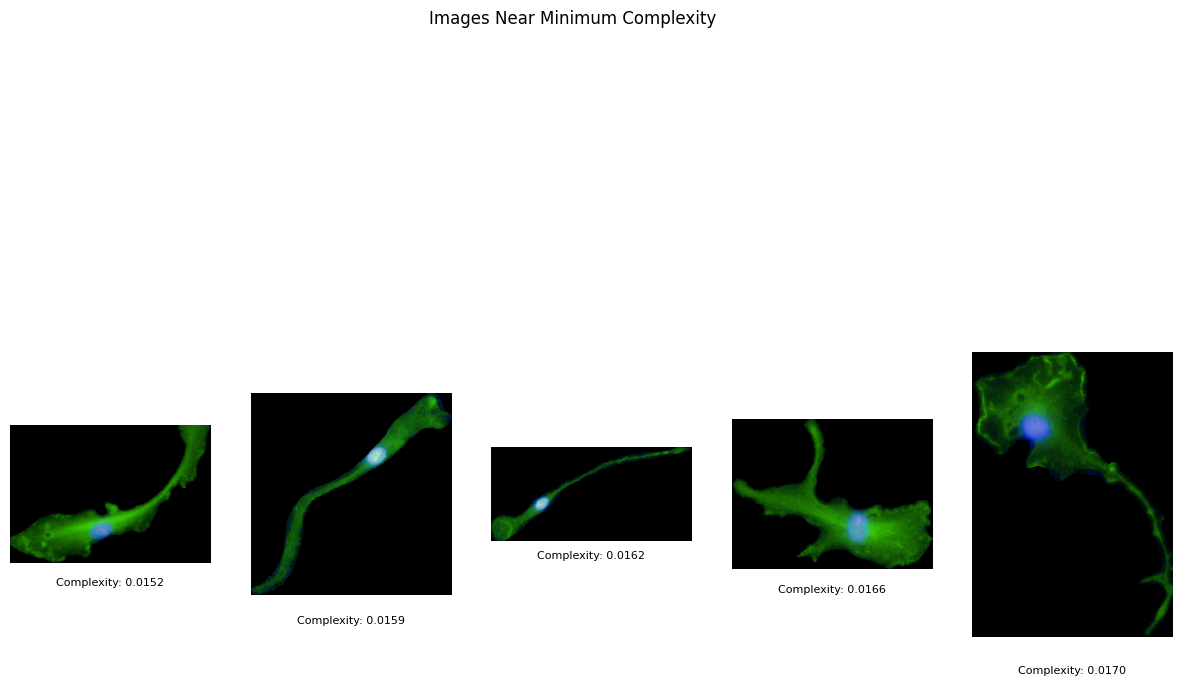

In [84]:
plot_sampled_images(pillImagesOriginal, complexities, min_indices, "Images Near Minimum Complexity")

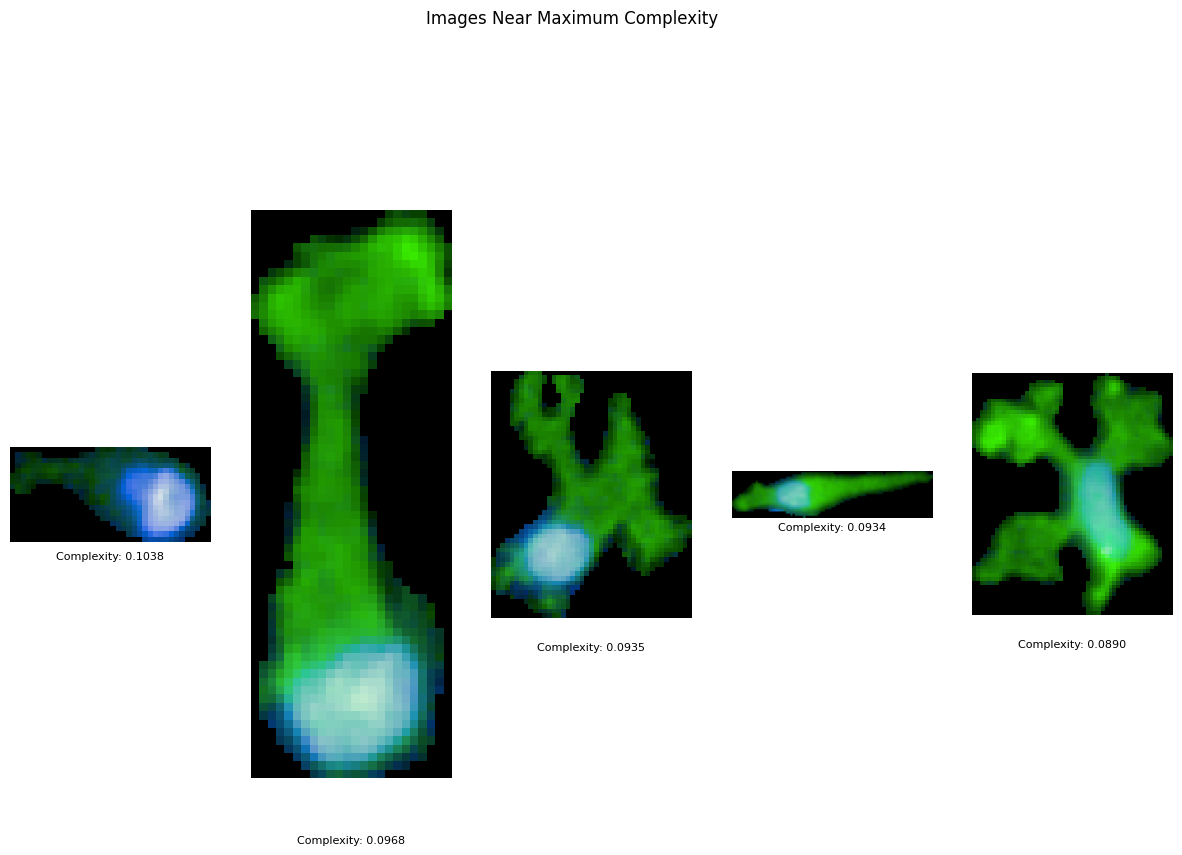

In [85]:
plot_sampled_images(pillImagesOriginal, complexities, max_indices, "Images Near Maximum Complexity")

In [97]:
indices_near_point7 = find_nearest_indices(complexities, 0.07)

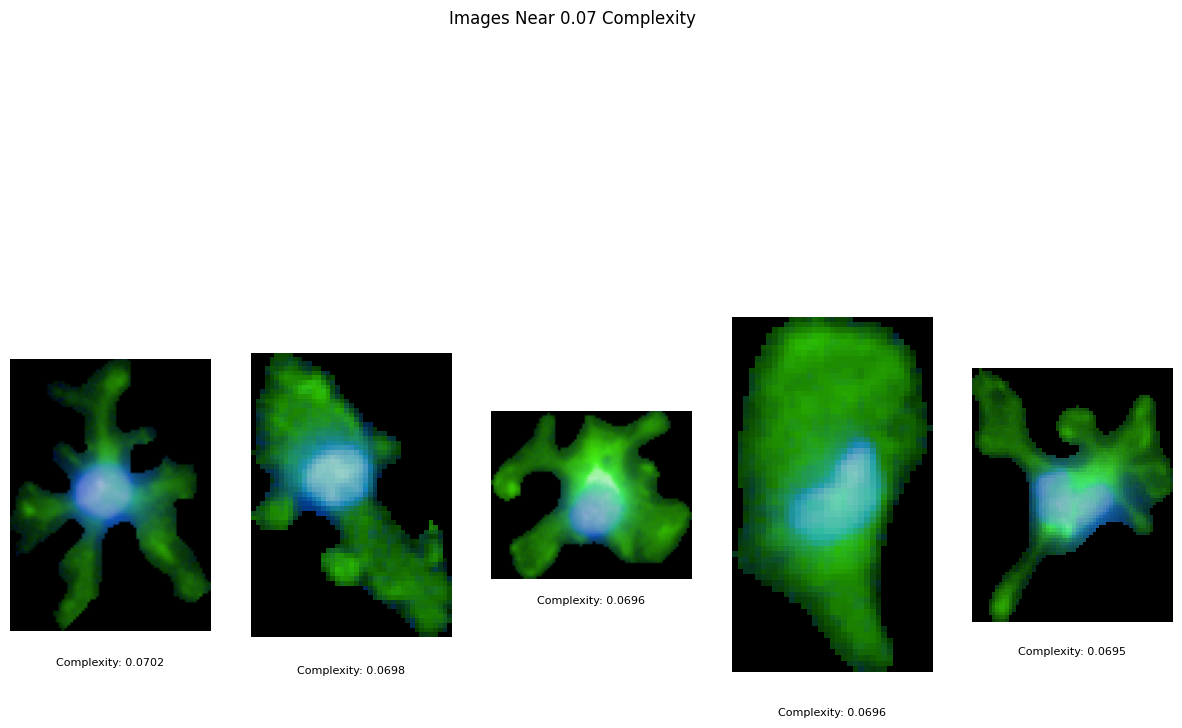

In [98]:
plot_sampled_images(pillImagesOriginal, complexities, indices_near_point7, "Images Near 0.07 Complexity")

10 samples through the distribution.

In [112]:
# Ensure data is sorted by complexity
sorted_indices = np.argsort(complexities)
sorted_images = [pillImagesOriginal[i] for i in sorted_indices]
sorted_complexities = complexities[sorted_indices]

In [113]:
# Select 10 samples through the distribution
samples_indices = np.linspace(0, len(sorted_images) - 1, 10, dtype=int)
selected_samples = [sorted_images[i] for i in samples_indices]
selected_complexities = [sorted_complexities[i] for i in samples_indices]

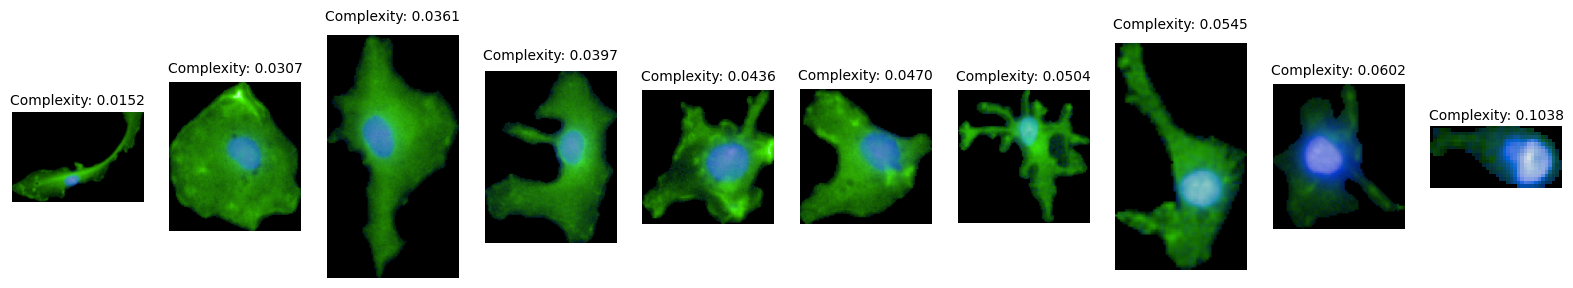

In [117]:
fig, axs = plt.subplots(1, 10, figsize=(20, 4))  # Increased vertical size
for ax, img, comp in zip(axs, selected_samples, selected_complexities):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5, 1.05, f'Complexity: {comp:.4f}', ha='center', va='bottom', transform=ax.transAxes, fontsize=10, color='black')

plt.subplots_adjust(bottom=0.15)
plt.show()

Sihouette Analysis.

In [101]:
complexitiesReshaped = complexities.reshape(-1, 1)

For n_clusters = 2 The average silhouette_score is: 0.5528211183703957
For n_clusters = 3 The average silhouette_score is: 0.5326010311074196
For n_clusters = 4 The average silhouette_score is: 0.5233678785565512
For n_clusters = 5 The average silhouette_score is: 0.5364650799468041
For n_clusters = 6 The average silhouette_score is: 0.5232306760136026
For n_clusters = 7 The average silhouette_score is: 0.5303111290908812
For n_clusters = 8 The average silhouette_score is: 0.5104532384451608
For n_clusters = 9 The average silhouette_score is: 0.5206846576989371
For n_clusters = 10 The average silhouette_score is: 0.5320584421521564


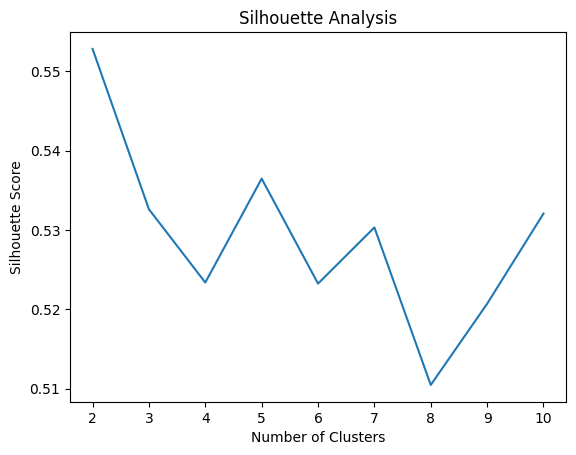

In [102]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(complexitiesReshaped)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(complexitiesReshaped, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

K-means clustering with k=2.

In [103]:
# Number of clusters are chosen to be 2
k = 2
# Perform KMeans clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=k, n_init='auto')
clusters = kmeans.fit_predict(complexitiesReshaped)

In [104]:
cluster_centers = kmeans.cluster_centers_.flatten()

# Find the closest images to each cluster center
closest_images_indices = []
for center in cluster_centers:
    # Calculate the absolute differences between the cluster center and each complexity ratio
    differences = np.abs(complexitiesReshaped.flatten() - center)
    # Find the index of the smallest difference for this cluster center
    closest_image_idx = np.argmin(differences)
    closest_images_indices.append(closest_image_idx)

In [107]:
clustered_images = defaultdict(list)
# Get the cluster assignments for each data point
labels = kmeans.labels_
for label, img in zip(labels, pillImagesOriginal):
    clustered_images[label].append(img)

In [108]:
selected_images_random = {}
for cluster, images in clustered_images.items():
    if len(images) >= 5:
        selected_images_random[cluster] = random.sample(images, 5)
    else:
        # If a cluster has fewer than 5 images, take all images
        selected_images_random[cluster] = images

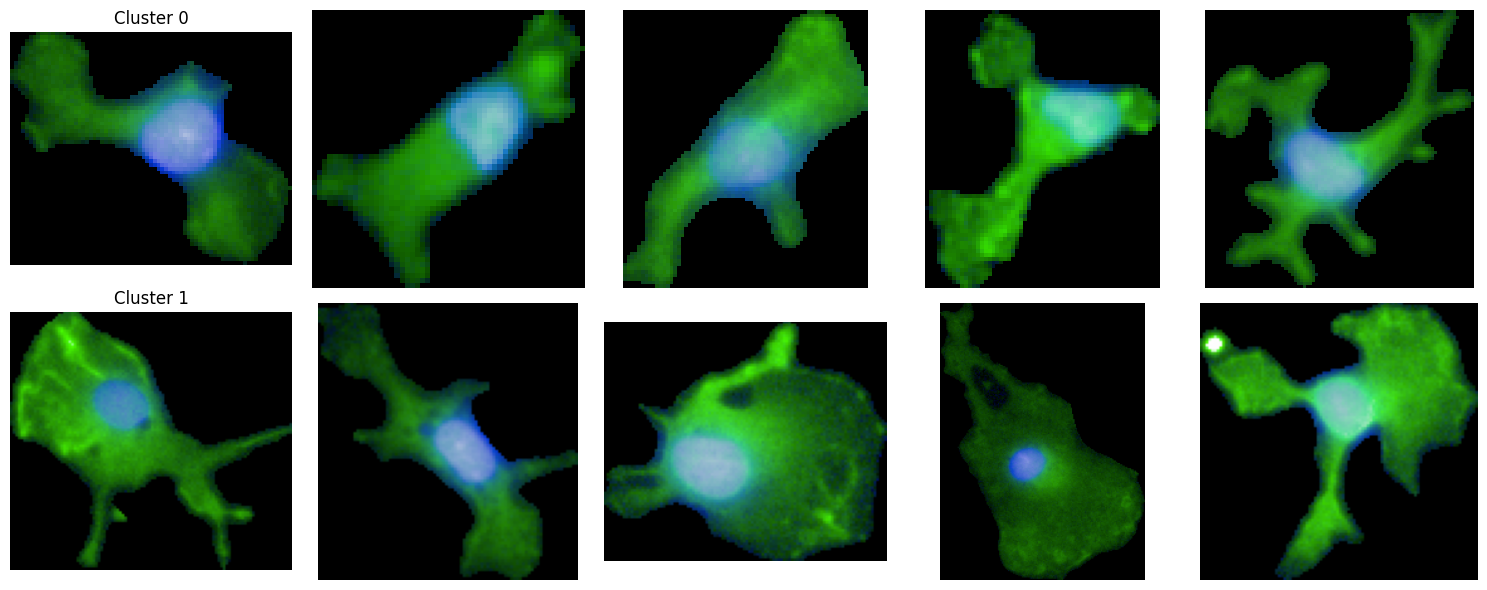

In [109]:
n_clusters = len(selected_images_random)
fig, axs = plt.subplots(n_clusters, 5, figsize=(15, 3 * n_clusters))

for i, (cluster, images) in enumerate(selected_images_random.items()):
    for j, img in enumerate(images):
        if n_clusters == 1:
            ax = axs[j]
        else:
            ax = axs[i, j]
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()